<a href="https://colab.research.google.com/github/AlexandreLarget/advanced_computer_vision/blob/main/07_Inception_GoogleLeNet_handmade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creation IMG

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
img = np.random.randint(0, 255, size=(224, 224, 3))
img = img /255.0

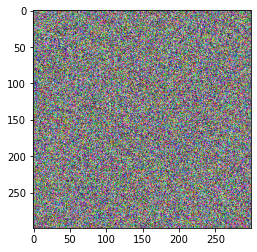

In [ ]:
plt.imshow(img);

In [ ]:
img = tf.expand_dims(img, 0)
img.shape

TensorShape([1, 299, 299, 3])

# Inception layer study

In [ ]:
i = layers.Input(shape=(28, 28, 3))
x = layers.Conv2D(64, kernel_size=1, strides=1, padding="same")(i)
model = tf.keras.Model(i,x)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
img_conv = model(img)
img_conv.shape

TensorShape([1, 28, 28, 64])

In [ ]:
i = layers.Input(shape=img[0].shape)

x1 = layers.Conv2D(64, kernel_size=1, strides=1, padding="same", name="1_1")(i)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Activation("relu")(x1)

x2 = layers.Conv2D(96, kernel_size=1, strides=1, padding="same")(i)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Activation("relu")(x2)
x2 = layers.Conv2D(128, kernel_size=3, strides=1, padding="same", name="3_3")(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Activation("relu")(x2)

x3 = layers.Conv2D(16, kernel_size=1, strides=1, padding="same")(i)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Activation("relu")(x3)
x3 = layers.Conv2D(32, kernel_size=5, strides=1, padding="same", name="5_5")(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Activation("relu")(x3)

x4 = layers.AveragePooling2D(pool_size=3, strides=1, padding="same")(i)

xf = layers.concatenate([x1, x2, x3, x4])

model = tf.keras.Model(inputs=i, outputs=xf)

In [ ]:
model.summary()

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_38 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_62 (Conv2D)             (None, 224, 224, 96  384         ['input_38[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_63 (Conv2D)             (None, 224, 224, 16  64          ['input_38[0][0]']               
                                )                                                          

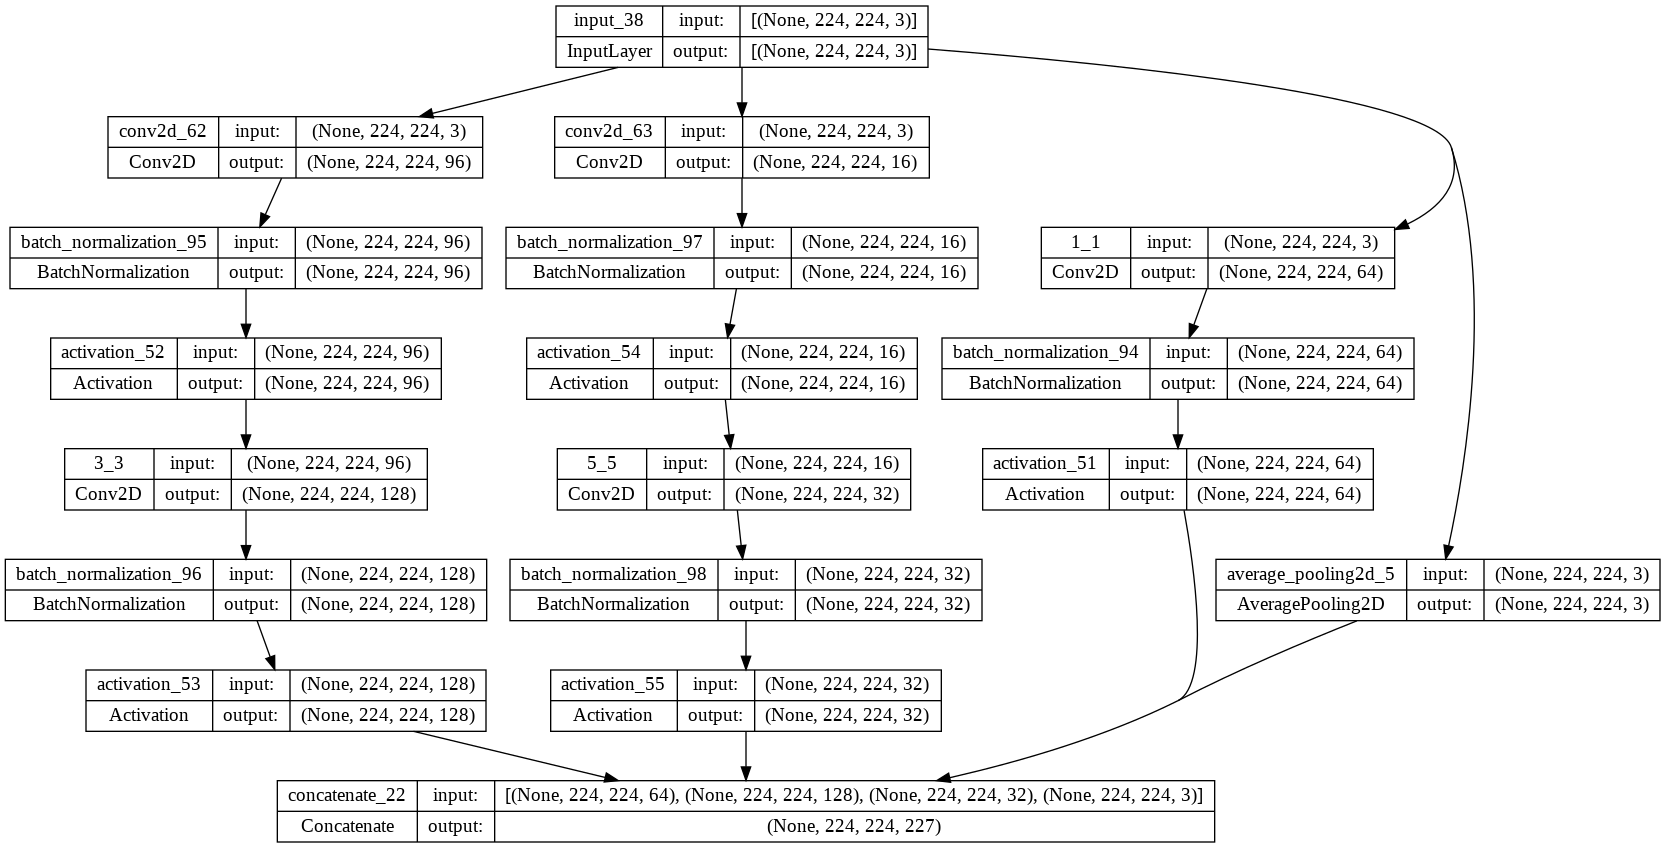

In [ ]:
plot_model(model, show_shapes=True)

# Inception building GoogleLeNet

In [ ]:
def inception_layer(input_, filters):
  f1, f2, f3, f4, f5, f6 = filters

  x1 = layers.Conv2D(f1, kernel_size=1, strides=1, padding="same", 
                     #name="1_1"
                     )(input_)
  x1 = layers.BatchNormalization()(x1)
  x1 = layers.Activation("relu")(x1)

  x2 = layers.Conv2D(f2, kernel_size=1, strides=1, padding="same")(input_)
  x2 = layers.BatchNormalization()(x2)
  x2 = layers.Activation("relu")(x2)
  x2 = layers.Conv2D(f3, kernel_size=3, strides=1, padding="same", 
                     #name="3_3"
                     )(x2)
  x2 = layers.BatchNormalization()(x2)
  x2 = layers.Activation("relu")(x2)

  x3 = layers.Conv2D(f4, kernel_size=1, strides=1, padding="same")(input_)
  x3 = layers.BatchNormalization()(x3)
  x3 = layers.Activation("relu")(x3)
  x3 = layers.Conv2D(f5, kernel_size=5, strides=1, padding="same", 
                     #name="5_5"
                     )(x3)
  x3 = layers.BatchNormalization()(x3)
  x3 = layers.Activation("relu")(x3)

  x4 = layers.AveragePooling2D(pool_size=3, strides=1, padding="same")(input_)
  x4 = layers.Conv2D(f6, kernel_size=1, strides=1, padding="same")(x4)
  x4 = layers.BatchNormalization()(x4)
  x4 = layers.Activation("relu")(x4)

  xf = layers.concatenate([x1, x2, x3, x4])

  return xf

In [ ]:
def inception_layer_with_output(input_, filters, filter_output, n_classes):
  f1, f2, f3, f4, f5, f6 = filters

  x1 = layers.Conv2D(f1, kernel_size=1, strides=1, padding="same", 
                     #name="1_1"
                     )(input_)
  x1 = layers.BatchNormalization()(x1)
  x1 = layers.Activation("relu")(x1)

  x2 = layers.Conv2D(f2, kernel_size=1, strides=1, padding="same")(input_)
  x2 = layers.BatchNormalization()(x2)
  x2 = layers.Activation("relu")(x2)
  x2 = layers.Conv2D(f3, kernel_size=3, strides=1, padding="same", 
                     #name="3_3"
                     )(x2)
  x2 = layers.BatchNormalization()(x2)
  x2 = layers.Activation("relu")(x2)

  x3 = layers.Conv2D(f4, kernel_size=1, strides=1, padding="same")(input_)
  x3 = layers.BatchNormalization()(x3)
  x3 = layers.Activation("relu")(x3)
  x3 = layers.Conv2D(f5, kernel_size=5, strides=1, padding="same", 
                     #name="5_5"
                     )(x3)
  x3 = layers.BatchNormalization()(x3)
  x3 = layers.Activation("relu")(x3)

  x4 = layers.MaxPooling2D(pool_size=3, strides=1, padding="same")(input_)
  x4 = layers.Conv2D(f6, kernel_size=1, strides=1, padding="same")(x4)
  x4 = layers.BatchNormalization()(x4)
  x4 = layers.Activation("relu")(x4)

  x5 = layers.AveragePooling2D(pool_size=5, strides=3, padding="valid")(input_)
  x5 = layers.Conv2D(filter_output, kernel_size=1, strides=1, padding="same")(x5)
  x5 = layers.BatchNormalization()(x5)
  x5 = layers.Dense(512, activation="relu")(x5)
  x5 = layers.Dense(n_classes, activation="relu")(x5)
  x5 = layers.Activation("softmax")(x5)

  xf = layers.concatenate([x1, x2, x3, x4])

  return xf, x5

In [ ]:
i = layers.Input(shape=img[0].shape)

x = layers.Conv2D(64, kernel_size=7, strides=2, padding="same", name="7_7_head")(i)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPool2D(pool_size=3, strides=2, padding="same")(x)

x = layers.BatchNormalization()(x)

x = layers.Conv2D(64, kernel_size=1, strides=1, padding="same", name="3_3_reduce_head")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(192, kernel_size=3, strides=1, padding="same", name="3_3_head")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPool2D(pool_size=3, strides=2, padding="same")(x)

x = inception_layer(input_=x, filters=[64, 96, 128, 16, 32, 32])
x = inception_layer(input_=x, filters=[128, 128, 192, 32, 96, 64])

x = layers.MaxPool2D(pool_size=3, strides=2, padding="same")(x)

x, x1 = inception_layer_with_output(input_=x, filters=[192, 96, 208, 16, 48, 64], filter_output=512, n_classes=8)
x = inception_layer(input_=x, filters=[160, 112, 224, 24, 64, 64])
x = inception_layer(input_=x, filters=[128, 128, 256, 24, 64, 64])
x = inception_layer(input_=x, filters=[112, 144, 288, 32, 64, 64])
x = inception_layer(input_=x, filters=[256, 160, 320, 32, 128, 128])

x = layers.MaxPool2D(pool_size=3, strides=2, padding="same")(x)

x, x2 = inception_layer_with_output(input_=x, filters=[256, 160, 320, 32, 128, 128], filter_output=528, n_classes=8)
x = inception_layer(input_=x, filters=[384, 192, 384, 48, 128, 128])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(8, activation="softmax")(x)

In [ ]:
model = tf.keras.Model(inputs=i,
                       outputs=[x, x1, x2])

In [ ]:
model.summary()

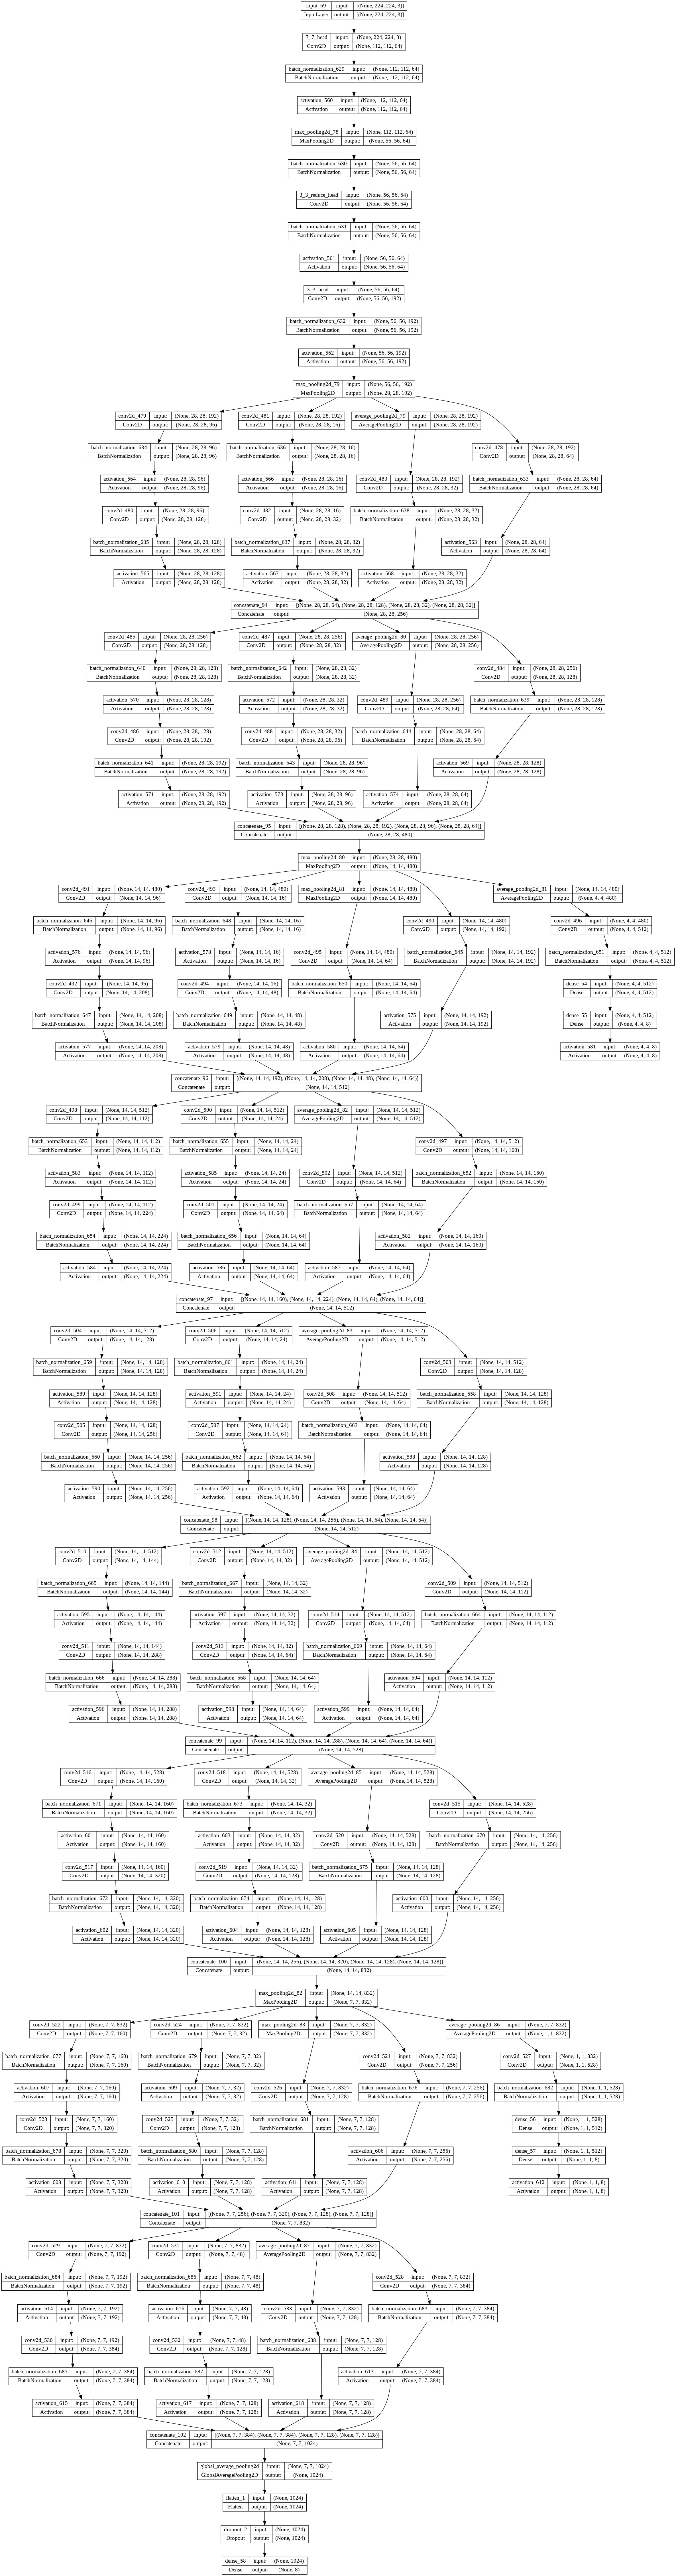

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
inceptionv3 = InceptionV3()

96112376/96112376 [==============================] - 0s 0us/step


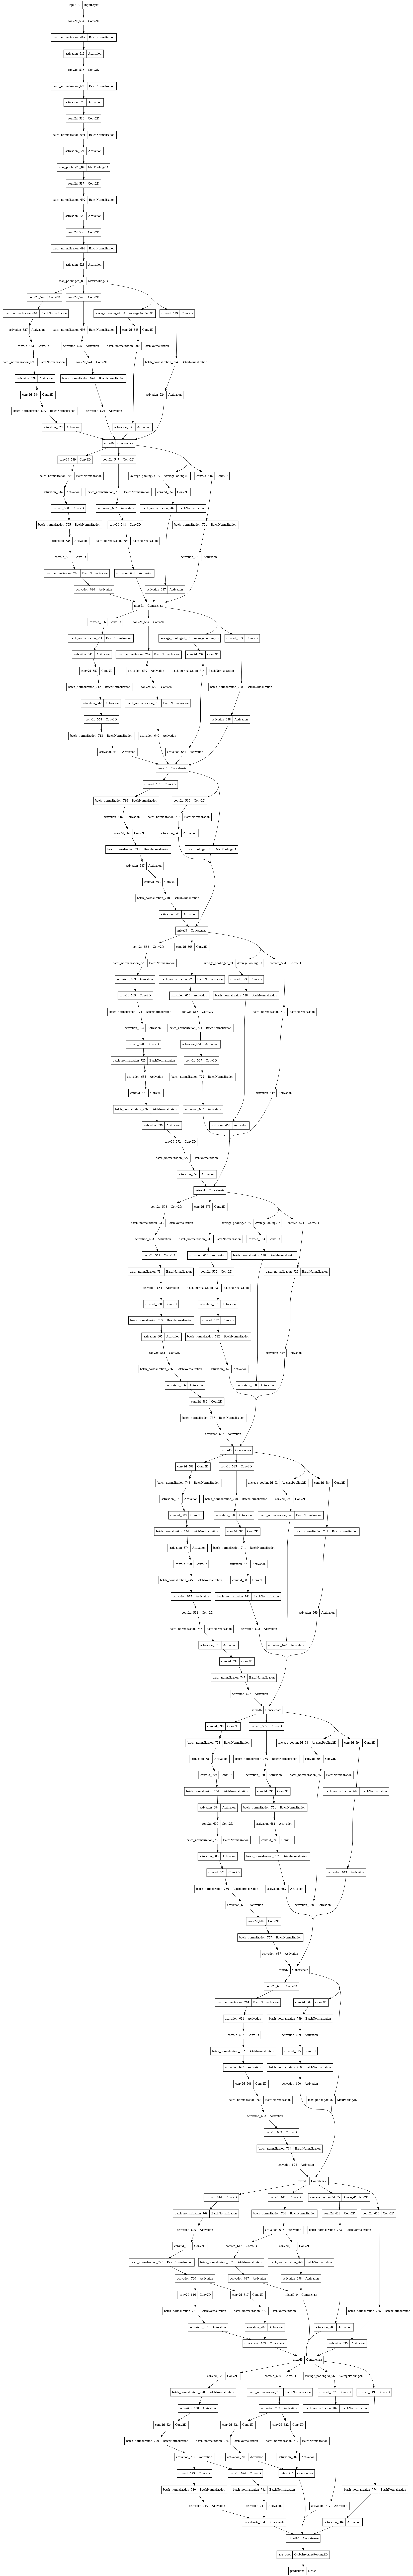

In [ ]:
plot_model(inceptionv3)